# AMP®-Parkinson's Disease Progression Prediction: DataFrame Creation

The goal of this Kaggle competition is to: "Use protein and peptide data measurements from Parkinson's Disease patients to predict progression of the disease". This notebook provides the necessary scripts to preprocess the .csv files into a DataFrame that is amenable to timeseries prediction.

In [1]:
# First we will import the necessary dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Before we do anything else, we will inspect the first dataset
df = pd.read_csv(r'C:\Users\usuario\RecogniChess\Parkinsons\train_peptides.csv')
df.head()

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


In [3]:
# Now the second dataset
df2 = pd.read_csv(r'C:\Users\usuario\RecogniChess\Parkinsons\train_proteins.csv')
df2.head()

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


In [4]:
# And finally the third dataset
df3 = pd.read_csv(r'C:\Users\usuario\RecogniChess\Parkinsons\train_clinical_data.csv')
df3.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


The clinical dataset has NaN values we will need to investigate.

In [5]:
# Let's inspect the shapes of all three
print(df.shape)
print(df2.shape)
print(df3.shape)

(981834, 6)
(232741, 5)
(2615, 8)


In [29]:
# Let's investigate the ratio of peptides to proteins
print(f'There are',round(981834 / 232741, 3),'more peptide samples than protein samples')

There are 4.219 more peptide samples than protein samples


Good to know. We also need to know how many unique patient_ids we have, as well as sessions per patient (session_id).

In [10]:
# How many unique patient ids do we have?
unique_ids_peptides = df['patient_id'].unique()
print(f'Total number of unique ids in peptides dataset:',len(unique_ids_peptides))
unique_ids_proteins = df2['patient_id'].unique()
print(f'Total number of unique ids in the proteins dataset:',len(unique_ids_proteins))
unique_ids_clinical = df3['patient_id'].unique()
print(f'Total number of unique ids in the clinical dataset:',len(unique_ids_clinical))

Total number of unique ids in peptides dataset: 248
Total number of unique ids in the proteins dataset: 248
Total number of unique ids in the clinical dataset: 248


In [7]:
# We will make use of the .value_counts() and len() functions to obtain both unique patient_id data and visit_id tags
count_patients = df['patient_id'].value_counts()
print('*************************************************')
print(f'Dataset 1: Number of unique patient IDs:',len(count_patients))
print(count_patients)

count_visits = df['visit_id'].value_counts()
print('*************************************************')
print(f'Dataset 1: Number of unique visit IDs:',len(count_visits))
print(count_visits)

*************************************************
Dataset 1: Number of unique patient IDs: 248
20404    8272
23391    8147
62723    8111
26210    8076
18183    7965
         ... 
55240    1810
52119    1804
25911    1782
42086    1781
41930     876
Name: patient_id, Length: 248, dtype: int64
*************************************************
Dataset 1: Number of unique visit IDs: 1113
47171_6     947
16574_12    946
35477_48    945
47171_36    944
35675_12    944
           ... 
57478_24    538
19088_12    529
58648_84    525
19088_48    497
25562_36     94
Name: visit_id, Length: 1113, dtype: int64


In [8]:
# Ditto for df2
count_patients = df2['patient_id'].value_counts()
print('*************************************************')
print(f'Dataset 2: Number of unique patient IDs:',len(count_patients))
print(count_patients)

count_visits = df2['visit_id'].value_counts()
print('*************************************************')
print(f'Dataset 2: Number of unique visit IDs:',len(count_visits))
print(count_visits)

*************************************************
Dataset 2: Number of unique patient IDs: 248
62723    1929
20404    1924
23391    1919
26210    1912
18183    1899
         ... 
55240     429
42086     427
25911     419
52119     417
41930     199
Name: patient_id, Length: 248, dtype: int64
*************************************************
Dataset 2: Number of unique visit IDs: 1113
55_36       224
47171_12    224
27715_36    224
48780_6     224
47171_6     224
           ... 
58648_6     159
58648_84    157
18560_48    157
11928_0     138
25562_36     37
Name: visit_id, Length: 1113, dtype: int64


In [9]:
# For df3, we will inspect where the missing values are in df3
print(df3.isna().sum())

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   1
updrs_2                                   2
updrs_3                                  25
updrs_4                                1038
upd23b_clinical_state_on_medication    1327
dtype: int64


A few things to note already: 
- The peptide dataset and the protein dataset only contain one unique column each 
- The number of rows is different across the three dfs 
- There are 4.2 more peptide samples than there are protein samples
- There is an equal number of patient ids and session ids across all three datasets
- There are NAs in the clinical dataset which correspond to latter updrs items

From this, we can extract the following: 
- There is a protein count ('NPX' aka Number of proteins) for each unique protein measured ('UniProt') in a session
- For each UniProt, there are a ton of peptides, and each peptide has its own value count within a given session
- Because the peptide/protein ratio is not a pure integer, we may have varying labels of peptides being measured per 'UniProt' across sessions/people
- Latter updrs items were likely only recorded in later sessions, which would explain why they are not available for earlier sessions

In [30]:
# We will now check if the values in the 'Peptide' column are the same for every changing value in the 'patient_id' column
grouped = df.groupby('patient_id')['Peptide'].nunique()
if len(grouped.unique()) == 1 and list(grouped.unique())[0] == 1:
    print("In dataset 1, the values in the 'Peptide' column are the same for every changing value in the 'patient_' column")
else:
    print("In dataset 1, the values in the 'Peptide' column are not the same for every changing value in the 'patient_id' column")

# We will also check if the values in the 'Peptide' column are the same for every changing value in the 'visit_id' column
grouped = df.groupby('visit_id')['Peptide'].nunique()
if len(grouped.unique()) == 1 and list(grouped.unique())[0] == 1:
    print("In dataset 1, the values in the 'Peptide' column are the same for every changing value in the 'visit_id' column")
else:
    print("In dataset 1, the values in the 'Peptide' column are not the same for every changing value in the 'visit_id' column")

In dataset 1, the values in the 'Peptide' column are not the same for every changing value in the 'patient_id' column
In dataset 1, the values in the 'Peptide' column are not the same for every changing value in the 'visit_id' column


In [31]:
# For DATASET 2 Check if the values in the 'Peptide' column are the same for every changing value in the 'patient_id' column
grouped = df2.groupby('patient_id')['UniProt'].nunique()
if len(grouped.unique()) == 1 and list(grouped.unique())[0] == 1:
    print("In dataset 2, the values in the UniProt' column are the same for every changing value in the 'patient_id' column")
else:
    print("In dataset 2, the values in the 'UniProt' column are not the same for every changing value in the 'patient_id' column")

# FOR DATASET 2 Check if the values in the 'Peptide' column are the same for every changing value in the 'visit_id' column
grouped = df2.groupby('visit_id')['UniProt'].nunique()
if len(grouped.unique()) == 1 and list(grouped.unique())[0] == 1:
    print("In dataset 2, the values in the UniProt' column are the same for every changing value in the 'visit_id' column")
else:
    print("In dataset 2, the values in the 'UniProt' column are not the same for every changing value in the 'visit_id' column")

In dataset 2, the values in the 'UniProt' column are not the same for every changing value in the 'patient_id' column
In dataset 2, the values in the 'UniProt' column are not the same for every changing value in the 'visit_id' column


This might be a problem. For now, let's investigate further:

In [13]:
# First we will group df2 by visit_id and create a list of unique UniProt values for each group
uni_prot_lists = df2.groupby('visit_id')['UniProt'].unique().tolist()
print('********************************')
print('****** WITHIN DATASET 2 *****')
print('********************************')
print(f'The length of unique UniProt values for visit_id 1 is:',len(uni_prot_lists[0]))
print('********************************')
print(f'The length of unique UniProt values for visit_id 2 is:',len(uni_prot_lists[1]))
print('********************************')
print(f'The length of unique UniProt values for visit_id 3 is:',len(uni_prot_lists[2]))
print('********************************')

# Get unique lengths of subarrays
unique_lengths = list(set(map(len, uni_prot_lists)))

# Print the 5 shortest lengths
print('The 5 shortest lengths of UniProt values are:', sorted(unique_lengths)[:5])

# Print the 5 longest lengths
print('The 5 longest lengths of UniProt values are:', sorted(unique_lengths)[-5:])

********************************
****** WITHIN DATASET 2 *****
********************************
The length of unique UniProt values for visit_id 1 is: 165
********************************
The length of unique UniProt values for visit_id 2 is: 171
********************************
The length of unique UniProt values for visit_id 3 is: 208
********************************
The 5 shortest lengths of UniProt values are: [37, 138, 157, 159, 160]
The 5 longest lengths of UniProt values are: [220, 221, 222, 223, 224]


It's starting to become apparent that the labels in the UniProt column of df2 vary from person to person, and even from session to session within the same individual. But exactly how many different sets of UniProt labels do we have?

In [14]:
# Let us see how many different UniProt lengths we have within df2

from collections import Counter

# Group df2 by visit_id and create a list of unique UniProt values for each group
uni_prot_lists = df2.groupby('visit_id')['UniProt'].unique().tolist()

# Get the unique lengths and their frequencies
unique_lengths, counts = np.unique([len(lst) for lst in uni_prot_lists], return_counts=True)

# Calculate the proportion of each unique length
proportions = counts / len(uni_prot_lists)

# Sort by length
sorted_lengths_proportions = sorted(list(zip(unique_lengths, proportions)), key=lambda x: x[0])

# Print the results
print("Total number of unique lengths of UniProt values across visit_ids:", len(unique_lengths))
for length, proportion in sorted_lengths_proportions:
    print("Proportion of length {}: {:.2%}".format(length, proportion))

Total number of unique lengths of UniProt values across visit_ids: 67
Proportion of length 37: 0.09%
Proportion of length 138: 0.09%
Proportion of length 157: 0.18%
Proportion of length 159: 0.09%
Proportion of length 160: 0.18%
Proportion of length 161: 0.09%
Proportion of length 163: 0.09%
Proportion of length 164: 0.09%
Proportion of length 165: 0.09%
Proportion of length 166: 0.09%
Proportion of length 167: 0.27%
Proportion of length 168: 0.09%
Proportion of length 169: 0.09%
Proportion of length 170: 0.09%
Proportion of length 171: 0.27%
Proportion of length 172: 0.18%
Proportion of length 173: 0.18%
Proportion of length 174: 0.27%
Proportion of length 175: 0.09%
Proportion of length 177: 0.09%
Proportion of length 178: 0.09%
Proportion of length 179: 0.27%
Proportion of length 180: 0.09%
Proportion of length 181: 0.36%
Proportion of length 182: 0.36%
Proportion of length 183: 0.27%
Proportion of length 184: 0.27%
Proportion of length 185: 0.18%
Proportion of length 186: 0.18%
Pro

In [15]:
# What about the total number of unique UniPro's within df2? 

proteins = df2['UniProt'].unique()
print(f'Total number of unique proteins in the proteins dataset:',len(proteins))

Total number of unique proteins in the proteins dataset: 227


This last cell is very important, because the variable 'proteins' we just created will be used later to create the new DataFrame.

But for now there are a few more things to note about df2 specifically:

- For every session, the number of unique protein labels can vary, anywhere from 37 to 224
- There are a total of 227 unique proteins being measured across the entire df2. Evidently, no one seassion managed to measure all of them

So, within df2, we have different numbers of proteins being measured at every session. Thus, the 'UniProt' variable's sequence lengths will vary, and since each protein has an associated NPX value of interest, every NPX sequence we want to use to predict our target will have varying lenghts depending on the session. In light of this, we will have to use an LSTM model, which can naturally handle sequences of varying lengths. However, we won't actually pass it sequences of varying lengths. Instead, we will contstruct a data structure that will be 227 entries wide, whose rows will represent the different sessions, and whose entries will hold the NPX values for every session, ordered by UniProt label. The key is that we will fill any NPX gaps with tokens that the model will learn to ignore. This way, we will be able to feed the model sequences of varying lengths, by passing it an array structure of uniform length.

Before we do that, a bit more visualizing is in order. Namely, we must look at our four targets:

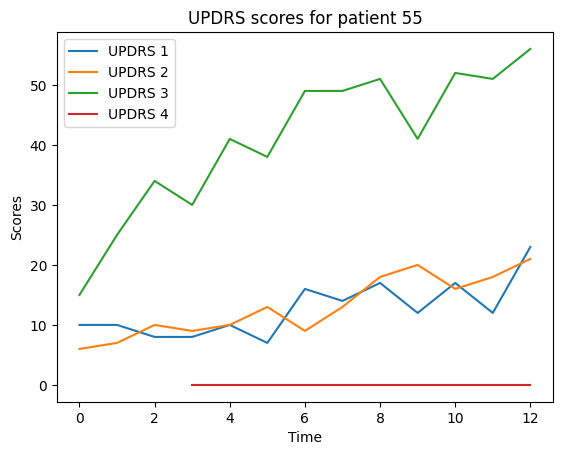

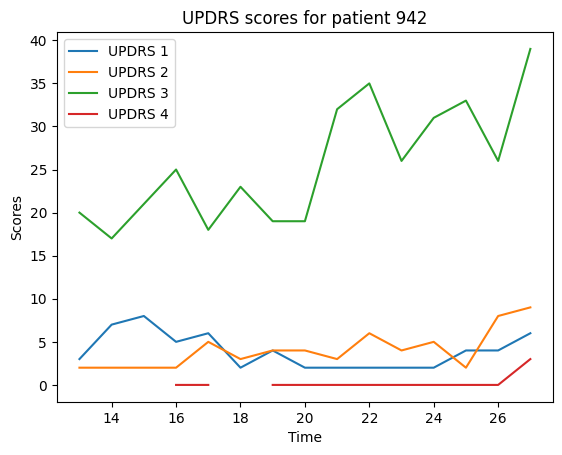

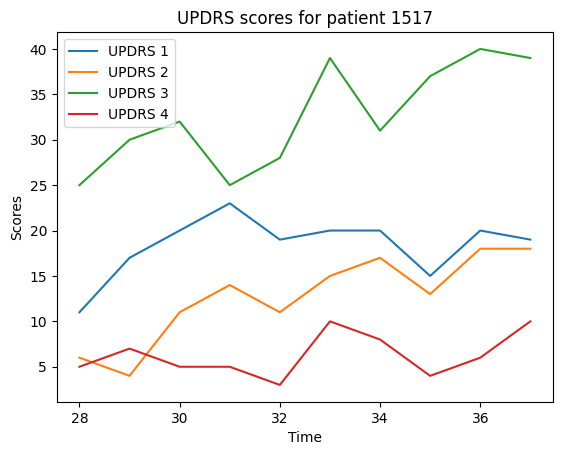

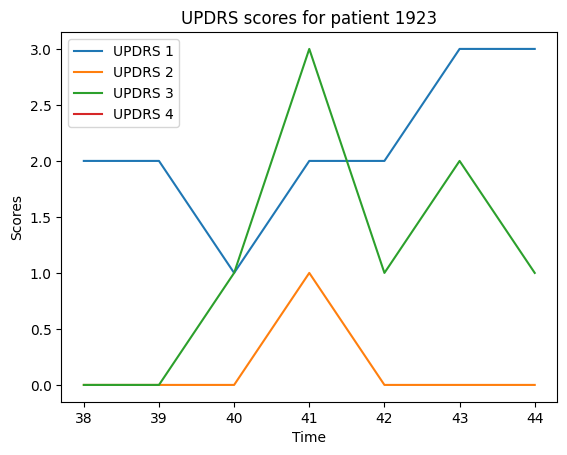

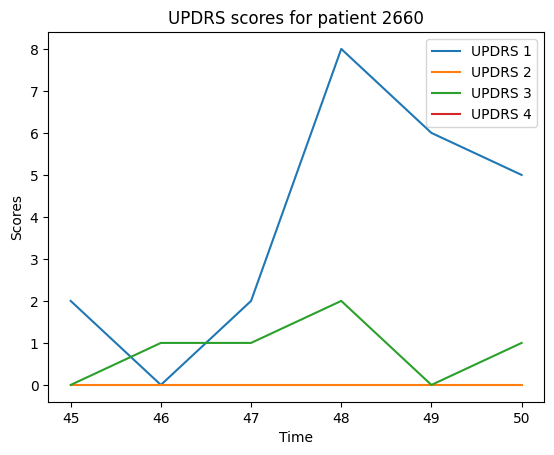

In [16]:
# Let's check out the targets for every patient

# We will get the unique patient IDs for the first five patients
patient_ids = df3['patient_id'].unique()[:5]

# We create the labels for the legend
labels = ['UPDRS 1', 'UPDRS 2', 'UPDRS 3', 'UPDRS 4']

# We iterate over the patient IDs and plot the UPDRS scores
for pid in patient_ids:
    plt.figure()
    plt.plot(df3['updrs_1'][df3['patient_id'] == pid])
    plt.plot(df3['updrs_2'][df3['patient_id'] == pid])
    plt.plot(df3['updrs_3'][df3['patient_id'] == pid])
    plt.plot(df3['updrs_4'][df3['patient_id'] == pid])
    plt.legend(labels)
    plt.title(f'UPDRS scores for patient {pid}')
    plt.xlabel('Time')
    plt.ylabel('Scores')
    plt.show()


We've gained some further insight into the data. It looks like the scores are mostly on the same scale, but UDPRS3 scores are all a bit higher than the others. As for UPDRS4, it is the lowest and in some cases (for patients for whom we only have early sessions) it's quite flat. Not only that, it also has missing values that we will have to impute somehow. This will likely be the hardest target to predict. 

We are now ready to begin constructing the new DataFrame object that will be passed to the model. It will contain many, many columns. Essentially, we are transforming our long data to wide data in order to make it more amenable to predictions based on structures (Seq2Vec predictions).

In [32]:
# First we copy over the patient and visit columns from our df2 into our brand new DataFrame object, which we will call df2_seq
df2_seq = df2[['patient_id', 'visit_id']]

# Then we will tell pandas to create one new column for every entry in 'proteins' and assign NaN values to all rows for now
for protein in proteins:
    df2_seq = df2_seq.assign(**{protein: np.nan})

# We take a look at the result    
df2_seq.head()

,patient_id,visit_id,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,...,Q9Y646,Q9Y6R7,P01594,P02792,P32754,P60174,Q13449,Q99683,Q99829,Q9UKV8
0,55,55_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55,55_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,55_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55,55_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55,55_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have set up the basic architecture of our new dataframe, we will need to populate the values which are currently occupied by NaNs with their corresponding NPX values, based on the column label for each protein, as well as each of the row labels within visit_id. For this, we will create a custom function. Then, we will tokenize the remaining NaNs, which correspond to true missing entries, so that the model knows that it should ignore those entries. After doing this, we will also add the four target columns from df3 by inserting them in between visit_id and O00391 (first protein column) in df2_seq: 

In [18]:
# We create a dictionary to store protein-NPX mappings for each visit ID
protein_npx_dict = {}

# We loop through each row in df2
for index, row in df2.iterrows():
    # We get the visit ID for this row
    visit_id = row['visit_id']
    
    # We check if we've already created an entry in the dictionary for this visit ID
    if visit_id not in protein_npx_dict:
        # If not, we create a new dictionary to store protein-NPX mappings for this visit ID
        protein_npx_dict[visit_id] = {}
    
    # Get the protein and NPX values for this row
    protein = row['UniProt']
    npx = row['NPX']
    
    # Add this protein-NPX mapping to the dictionary for this visit ID
    protein_npx_dict[visit_id][protein] = npx
    
# Loop through each row in df2_seq
for index, row in df2_seq.iterrows():
    # Get the visit ID for this row
    visit_id = row['visit_id']
    
    # Loop through each protein in the proteins list
    for protein in proteins:
        # Check if this protein exists in the dictionary for this visit ID
        if visit_id in protein_npx_dict and protein in protein_npx_dict[visit_id]:
            # If so, get the corresponding NPX value and assign it to the appropriate column in df2_seq
            npx = protein_npx_dict[visit_id][protein]
            df2_seq.at[index, protein] = npx

In [19]:
# Let's take a look
df2_seq.head()

,patient_id,visit_id,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,...,Q9Y646,Q9Y6R7,P01594,P02792,P32754,P60174,Q13449,Q99683,Q99829,Q9UKV8
0,55,55_0,11254.3,732430.0,39585.8,41526.9,31238.0,4202.71,177775.0,62898.2,...,23833.7,18953.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55,55_0,11254.3,732430.0,39585.8,41526.9,31238.0,4202.71,177775.0,62898.2,...,23833.7,18953.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,55_0,11254.3,732430.0,39585.8,41526.9,31238.0,4202.71,177775.0,62898.2,...,23833.7,18953.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55,55_0,11254.3,732430.0,39585.8,41526.9,31238.0,4202.71,177775.0,62898.2,...,23833.7,18953.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55,55_0,11254.3,732430.0,39585.8,41526.9,31238.0,4202.71,177775.0,62898.2,...,23833.7,18953.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Now that our data is both wide and populated, we can delete the duplicate rows
df2_seq.drop_duplicates(subset=['visit_id'], keep='first', inplace=True)
df2_seq.head()

,patient_id,visit_id,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,...,Q9Y646,Q9Y6R7,P01594,P02792,P32754,P60174,Q13449,Q99683,Q99829,Q9UKV8
0,55,55_0,11254.3,732430.0,39585.8,41526.9,31238.00,4202.71,177775.0,62898.2,...,23833.70,18953.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,1517,1517_0,11648.9,419015.0,35053.8,NaN,17466.30,2784.40,118752.0,40274.9,...,19771.60,14699.50,18356.4,25826.9,124675.0,18494.3,32892.8,90539.1,11373.4,55379.8
436,1923,1923_0,21361.8,866985.0,32035.1,NaN,13373.10,NaN,269106.0,81580.2,...,26346.20,23597.10,NaN,27842.6,75856.4,12385.7,22141.7,93929.3,12141.1,64302.3
643,2660,2660_0,NaN,579829.0,28259.8,29883.2,19134.10,1884.61,134409.0,70664.8,...,25630.00,17990.90,10813.8,NaN,103346.0,14354.8,29919.2,86771.8,NaN,55047.2
855,3636,3636_0,10887.0,267402.0,11390.4,15696.3,6646.16,2962.85,61555.3,25927.8,...,7985.07,8587.01,NaN,NaN,NaN,NaN,20737.9,77076.9,NaN,NaN


In [21]:
# We can then sort values based on 'patient_id'
df2_seq.sort_values('patient_id')
df2_seq.head()

,patient_id,visit_id,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,...,Q9Y646,Q9Y6R7,P01594,P02792,P32754,P60174,Q13449,Q99683,Q99829,Q9UKV8
0,55,55_0,11254.3,732430.0,39585.8,41526.9,31238.00,4202.71,177775.0,62898.2,...,23833.70,18953.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,1517,1517_0,11648.9,419015.0,35053.8,NaN,17466.30,2784.40,118752.0,40274.9,...,19771.60,14699.50,18356.4,25826.9,124675.0,18494.3,32892.8,90539.1,11373.4,55379.8
436,1923,1923_0,21361.8,866985.0,32035.1,NaN,13373.10,NaN,269106.0,81580.2,...,26346.20,23597.10,NaN,27842.6,75856.4,12385.7,22141.7,93929.3,12141.1,64302.3
643,2660,2660_0,NaN,579829.0,28259.8,29883.2,19134.10,1884.61,134409.0,70664.8,...,25630.00,17990.90,10813.8,NaN,103346.0,14354.8,29919.2,86771.8,NaN,55047.2
855,3636,3636_0,10887.0,267402.0,11390.4,15696.3,6646.16,2962.85,61555.3,25927.8,...,7985.07,8587.01,NaN,NaN,NaN,NaN,20737.9,77076.9,NaN,NaN


In [22]:
# And finally the indices need to be reset
df2_seq = df2_seq.reset_index(drop=True)
df2_seq.head()

,patient_id,visit_id,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,...,Q9Y646,Q9Y6R7,P01594,P02792,P32754,P60174,Q13449,Q99683,Q99829,Q9UKV8
0,55,55_0,11254.3,732430.0,39585.8,41526.9,31238.00,4202.71,177775.0,62898.2,...,23833.70,18953.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1517,1517_0,11648.9,419015.0,35053.8,NaN,17466.30,2784.40,118752.0,40274.9,...,19771.60,14699.50,18356.4,25826.9,124675.0,18494.3,32892.8,90539.1,11373.4,55379.8
2,1923,1923_0,21361.8,866985.0,32035.1,NaN,13373.10,NaN,269106.0,81580.2,...,26346.20,23597.10,NaN,27842.6,75856.4,12385.7,22141.7,93929.3,12141.1,64302.3
3,2660,2660_0,NaN,579829.0,28259.8,29883.2,19134.10,1884.61,134409.0,70664.8,...,25630.00,17990.90,10813.8,NaN,103346.0,14354.8,29919.2,86771.8,NaN,55047.2
4,3636,3636_0,10887.0,267402.0,11390.4,15696.3,6646.16,2962.85,61555.3,25927.8,...,7985.07,8587.01,NaN,NaN,NaN,NaN,20737.9,77076.9,NaN,NaN


The next step is where we will fill the remaining NaNs, corresponding to true missing values, with the value -666, which will be our token value &#x1F608;

In [ ]:
# We tell pandas to fill the NAs with -666
df2_seq = df2_seq.fillna(-666)
df2_seq.head()

In [24]:
# We are ready to plug the behavioural scores from df3 right into df2_seq
df2_seq.insert(2, 'updrs_1', df3['updrs_1'])
df2_seq.insert(3, 'updrs_2', df3['updrs_2'])
df2_seq.insert(4, 'updrs_3', df3['updrs_3'])
df2_seq.insert(5, 'updrs_4', df3['updrs_4'])
df2_seq.head()

,patient_id,visit_id,updrs_1,updrs_2,updrs_3,updrs_4,O00391,O00533,O00584,O14498,...,Q9Y646,Q9Y6R7,P01594,P02792,P32754,P60174,Q13449,Q99683,Q99829,Q9UKV8
0,55,55_0,10.0,6.0,15.0,NaN,11254.3,732430.0,39585.8,41526.9,...,23833.70,18953.50,-666.0,-666.0,-666.0,-666.0,-666.0,-666.0,-666.0,-666.0
1,1517,1517_0,10.0,7.0,25.0,NaN,11648.9,419015.0,35053.8,-666.0,...,19771.60,14699.50,18356.4,25826.9,124675.0,18494.3,32892.8,90539.1,11373.4,55379.8
2,1923,1923_0,8.0,10.0,34.0,NaN,21361.8,866985.0,32035.1,-666.0,...,26346.20,23597.10,-666.0,27842.6,75856.4,12385.7,22141.7,93929.3,12141.1,64302.3
3,2660,2660_0,8.0,9.0,30.0,0.0,-666.0,579829.0,28259.8,29883.2,...,25630.00,17990.90,10813.8,-666.0,103346.0,14354.8,29919.2,86771.8,-666.0,55047.2
4,3636,3636_0,10.0,10.0,41.0,0.0,10887.0,267402.0,11390.4,15696.3,...,7985.07,8587.01,-666.0,-666.0,-666.0,-666.0,20737.9,77076.9,-666.0,-666.0


In [25]:
# These NAs are different, they correspond to missing behavioural scores for items that could only be filled at later sessions. We will impute with 0s
df2_seq = df2_seq.fillna(0)
df2_seq.head()

,patient_id,visit_id,updrs_1,updrs_2,updrs_3,updrs_4,O00391,O00533,O00584,O14498,...,Q9Y646,Q9Y6R7,P01594,P02792,P32754,P60174,Q13449,Q99683,Q99829,Q9UKV8
0,55,55_0,10.0,6.0,15.0,0.0,11254.3,732430.0,39585.8,41526.9,...,23833.70,18953.50,-666.0,-666.0,-666.0,-666.0,-666.0,-666.0,-666.0,-666.0
1,1517,1517_0,10.0,7.0,25.0,0.0,11648.9,419015.0,35053.8,-666.0,...,19771.60,14699.50,18356.4,25826.9,124675.0,18494.3,32892.8,90539.1,11373.4,55379.8
2,1923,1923_0,8.0,10.0,34.0,0.0,21361.8,866985.0,32035.1,-666.0,...,26346.20,23597.10,-666.0,27842.6,75856.4,12385.7,22141.7,93929.3,12141.1,64302.3
3,2660,2660_0,8.0,9.0,30.0,0.0,-666.0,579829.0,28259.8,29883.2,...,25630.00,17990.90,10813.8,-666.0,103346.0,14354.8,29919.2,86771.8,-666.0,55047.2
4,3636,3636_0,10.0,10.0,41.0,0.0,10887.0,267402.0,11390.4,15696.3,...,7985.07,8587.01,-666.0,-666.0,-666.0,-666.0,20737.9,77076.9,-666.0,-666.0


In [26]:
# The table looks good! But let us make sure we do not have any NAs anywhere else
any(df2_seq.isna().any())

False

Good, we have successfully created the DataFrame we needed. We will now save it and export it to a different notebook where we will run the LSTM model.

In [28]:
# Save df2_seq to the same directory as the other .csv files
df2_seq.to_csv('C:/Users/usuario/RecogniChess/Parkinsons/df2_seq.csv', index=False)